In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

In [3]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  MODData_Pandas28022025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-23,17384635.26,1168560.890,4.049147,13.133206,30019859
1,Feb-23,15768223.79,1167988.800,4.001956,13.356853,28741904
2,Mar-23,19750434.03,1374953.690,3.647640,13.541760,33406642
3,Apr-23,17571138.89,1394514.550,3.527485,12.664754,28702688
4,May-23,18533067.06,1573064.010,3.879662,11.887406,32465717
5,Jun-23,18649038.45,1563274.160,3.722715,10.891598,31244147
6,Jul-23,20742898.38,1683865.840,3.827571,12.961600,33571132
7,Aug-23,23445864.03,1764668.400,3.731248,13.410723,35625395
8,Sep-23,21119800.96,1754962.710,3.829266,12.107981,33384423
9,Oct-23,22294833.78,2017816.930,4.198328,11.989467,36447204


---
### Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

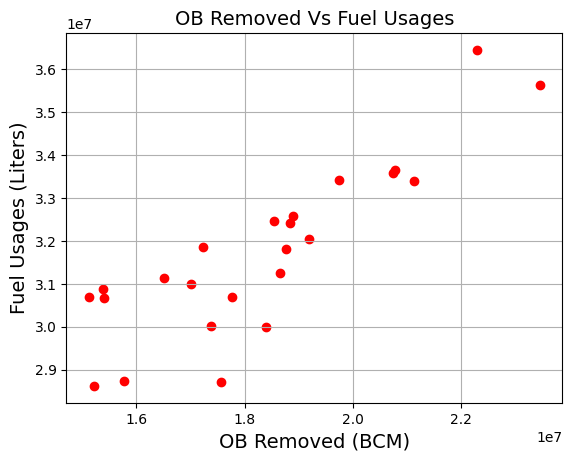

In [4]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

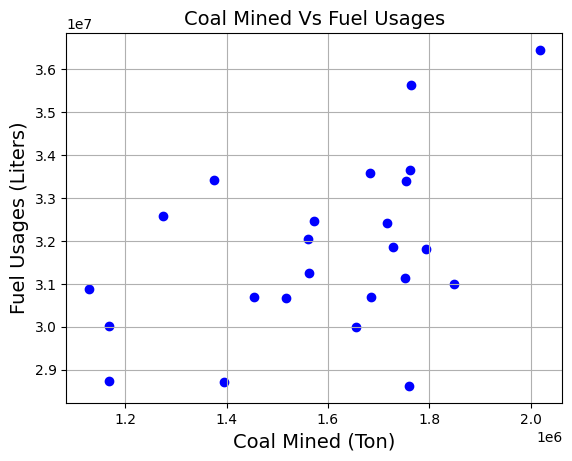

In [5]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

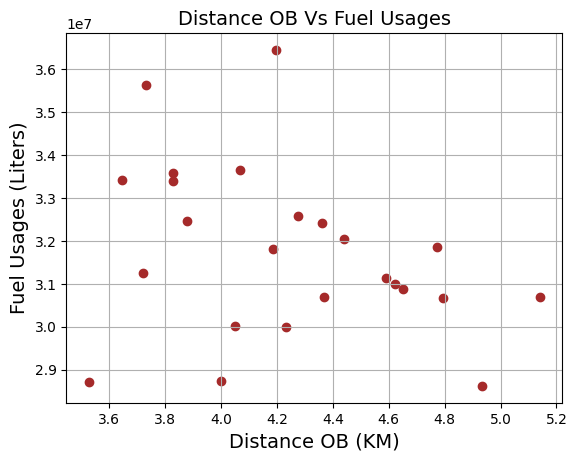

In [6]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

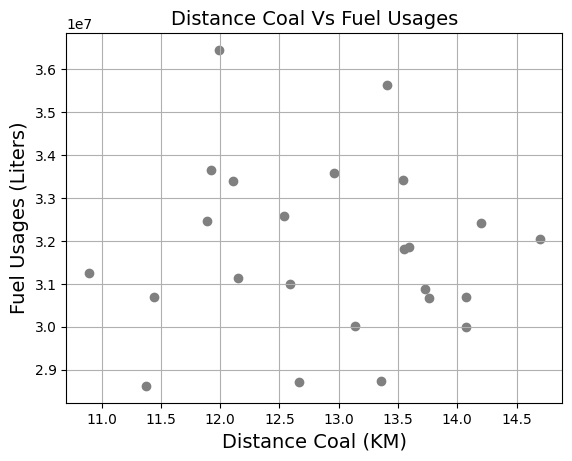

In [7]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

From Linearity test above we found that OB Removed, and OB Distance have linier relantionship with Fuel Usages

In [8]:
from sklearn import linear_model
import statsmodels.api as sm

In [9]:
x = dataset[['OB (Bcm)','Coal (Ton)']]
y = dataset['Fuel']
 
# Using sklearn

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: -->', regr.intercept_.round(3))
print('Coefficients: -->', regr.coef_.round(3))

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: --> 16854464.335
Coefficients: --> [0.702 1.267]
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     32.60
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           3.64e-07
Time:                        15:06:16   Log-Likelihood:                -364.65
No. Observations:                  24   AIC:                             735.3
Df Residuals:                      21   BIC:                             738.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------